In [1]:
import time
import itertools
import tracemalloc
import matplotlib.pyplot as plt
import random
import string

In [2]:
def brute_force_crack(target, charset, max_len):
    """
    Try all combinations from length=1..max_len using characters in charset.
    Returns (found_password, attempts, time_taken, peak_memory_kb).
    If not found within max_len, returns (None, attempts, time_taken, peak_memory_kb).
    """
    attempts = 0
    tracemalloc.start()
    start_time = time.time()
    found = None

    # Try increasing lengths from 1 to max_len
    for length in range(1, max_len + 1):
        # product returns tuples of characters of given length
        for comb in itertools.product(charset, repeat=length):
            attempts += 1
            guess = ''.join(comb)
            if guess == target:
                found = guess
                end_time = time.time()
                current, peak = tracemalloc.get_traced_memory()
                tracemalloc.stop()
                return found, attempts, end_time - start_time, peak / 1024  # KB
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return None, attempts, end_time - start_time, peak / 1024

In [3]:
charset = 'ab12'  # small charset to keep runs short for demo
tests = [
    ("a", 1),
    ("b2", 2),
    ("1a", 2),
    ("ab1", 3),   # length 3
]

In [4]:
print("Demo brute-force runs (small charset):")
results_demo = []
for pwd, max_len in tests:
    # To be safe, ensure target uses only characters in charset
    if any(ch not in charset for ch in pwd):
        print(f"Skipping {pwd} — contains chars not in charset.")
        continue
    found, attempts, t_taken, peak_kb = brute_force_crack(pwd, charset, max_len)
    results_demo.append((len(pwd), attempts, t_taken, peak_kb))
    print(f"Target: {pwd} | Found: {found} | Attempts: {attempts} | Time: {t_taken:.6f}s | Peak Mem: {peak_kb:.2f} KB")

Demo brute-force runs (small charset):
Target: a | Found: a | Attempts: 1 | Time: 0.000033s | Peak Mem: 0.11 KB
Target: b2 | Found: b2 | Attempts: 12 | Time: 0.000044s | Peak Mem: 0.20 KB
Target: 1a | Found: 1a | Attempts: 13 | Time: 0.000041s | Peak Mem: 0.20 KB
Target: ab1 | Found: ab1 | Attempts: 27 | Time: 0.000078s | Peak Mem: 0.21 KB


In [5]:
charset_exp = 'abc'  # small charset for experiments
max_test_length = 6  # highest length to test (keep small)
times = []
attempts_list = []
memories = []
lengths = list(range(1, max_test_length + 1))

In [6]:
random_targets = [''.join(random.choices(charset_exp, k=L)) for L in lengths]

for L, target in zip(lengths, random_targets):
    # set max_len = L so we guarantee that the target is within search space
    found, attempts, t_taken, peak_kb = brute_force_crack(target, charset_exp, L)
    times.append(t_taken)
    attempts_list.append(attempts)
    memories.append(peak_kb)
    print(f"[L={L}] target={target} | attempts={attempts} | time={t_taken:.6f}s | mem={peak_kb:.2f}KB")

[L=1] target=b | attempts=2 | time=0.000035s | mem=0.11KB
[L=2] target=cc | attempts=12 | time=0.000077s | mem=0.20KB
[L=3] target=bcb | attempts=29 | time=0.000089s | mem=0.21KB
[L=4] target=abac | attempts=51 | time=0.000130s | mem=0.36KB
[L=5] target=ccccc | attempts=363 | time=0.001130s | mem=0.34KB
[L=6] target=bccaba | attempts=826 | time=0.003649s | mem=0.36KB


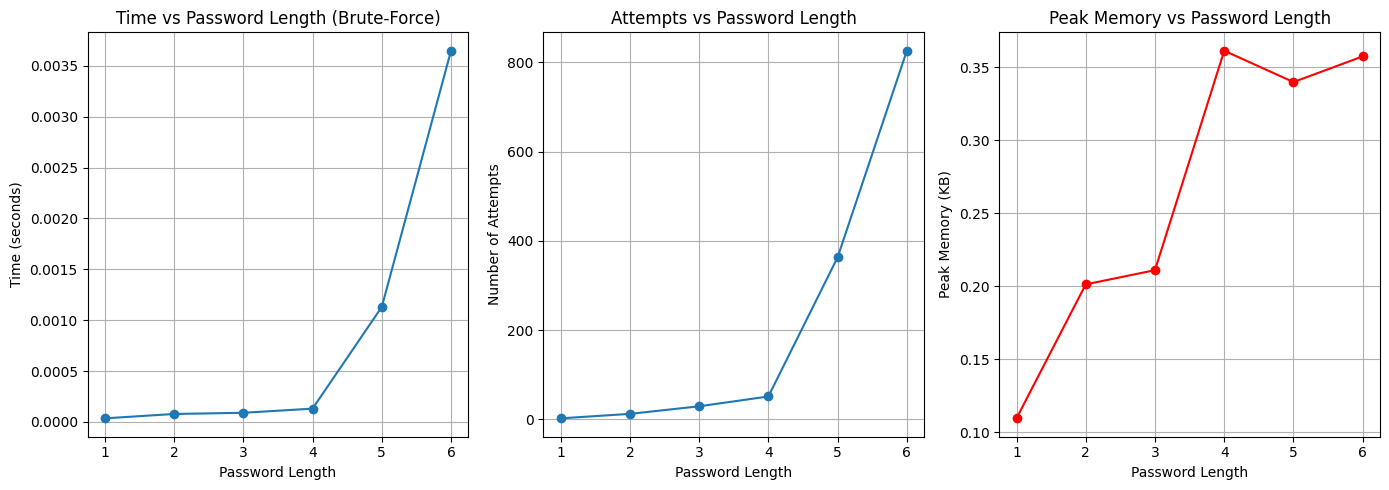

In [7]:
plt.figure(figsize=(14,5))

# Time vs Password Length
plt.subplot(1,3,1)
plt.plot(lengths, times, marker='o')
plt.title("Time vs Password Length (Brute-Force)")
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.grid(True)

# Attempts vs Password Length
plt.subplot(1,3,2)
plt.plot(lengths, attempts_list, marker='o')
plt.title("Attempts vs Password Length")
plt.xlabel("Password Length")
plt.ylabel("Number of Attempts")
plt.grid(True)

# Memory vs Password Length
plt.subplot(1,3,3)
plt.plot(lengths, memories, marker='o', color='red')
plt.title("Peak Memory vs Password Length")
plt.xlabel("Password Length")
plt.ylabel("Peak Memory (KB)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
print("\nSummary (experimental):")
for i, L in enumerate(lengths):
    print(f"Length {L}: Time={times[i]:.6f}s, Attempts={attempts_list[i]}, PeakMem={memories[i]:.2f}KB")


Summary (experimental):
Length 1: Time=0.000035s, Attempts=2, PeakMem=0.11KB
Length 2: Time=0.000077s, Attempts=12, PeakMem=0.20KB
Length 3: Time=0.000089s, Attempts=29, PeakMem=0.21KB
Length 4: Time=0.000130s, Attempts=51, PeakMem=0.36KB
Length 5: Time=0.001130s, Attempts=363, PeakMem=0.34KB
Length 6: Time=0.003649s, Attempts=826, PeakMem=0.36KB
